In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-28/afrisenti.csv').to_numpy()
countries = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-28/language_countries.csv').to_numpy()

In [27]:
print(data)
print(countries)

[['amh'
  'አማራ ክልል ፈልቶበታል ልኩን ማስገባት ነው!!! ሙስሊሞችን ጠልቶ 85% ሙስሊሞች በሚኖርባት ኦሮምያ ጋር ግንኙነትን አትሰበው !!!'
  'negative' 'dev']
 ['amh'
  'ሰውን አንገት በሚያስደፋ መልኩ ዝም ብሎ ሙድ መያዝ....ስልህ ያ ሰው ምንም ሳያጠፋ.....ተቀባብሎ መሣለቅ'
  'negative' 'dev']
 ['amh' 'የቤት ውስጥ ጥቃት – ያለሰሚ – ያለተመልካች' 'negative' 'dev']
 ...
 ['yor'
  'Ẹní tó làná, tó lòní, kò leè lọ̀la; Ọlọ́run nìkan ló lọjọ́ gbogbo / Whoever called the shots yesterday and calls the shots today, cannot call the shots tomorrow; only God calls the shots at all times. [Nothing lasts forever; change is certain; keep up hope]#Yoruba #proverbs'
  'positive' 'train']
 ['yor'
  'My God is """"""""onise iyanu"""""""" ( A Miracle Worker) #yoruba'
  'positive' 'train']
 ['yor'
  'RT @user: Ẹ wá ba mi re! #yorubafood #naijafood #africanfood http://t.co/T32HYEPg4M'
  'positive' 'train']]
[['amh' 'Ethiopia']
 ['arq' 'Algeria']
 ['ary' 'Morocco']
 ['hau' 'Cameroon']
 ['hau' 'Ghana']
 ['hau' 'Nigeria']
 ['ibo' 'Nigeria']
 ['kin' 'Rwanda']
 ['orm' 'Ethiopia']
 ['pcm' 'Cameroon']
 [

In [28]:
# Count number of positive and negative for each language

languages = {}
for i in range(len(data)):
    if data[i][0] in languages:
        if data[i][2] == 'positive':
            languages[data[i][0]][0] += 1
        elif data[i][2] == 'neutral':
            languages[data[i][0]][2] += 1
        else:
            languages[data[i][0]][1] += 1
    else:
        if data[i][2] == 'positive':
            languages[data[i][0]] = [1, 0, 0]
        elif data[i][2] == 'neutral':
            languages[data[i][0]] = [0, 0, 1]
        else:
            languages[data[i][0]] = [0, 1, 0]

In [29]:
print(languages)

{'amh': [2103, 3273, 4104], 'arq': [851, 1590, 582], 'ary': [3069, 2652, 3317], 'hau': [7329, 7226, 7597], 'ibo': [4762, 4013, 6940], 'kin': [1402, 1788, 1965], 'orm': [523, 948, 1023], 'pcm': [3652, 6380, 524], 'pt-MZ': [1480, 1633, 4379], 'swa': [908, 319, 1784], 'tir': [704, 1185, 509], 'tso': [601, 446, 214], 'twi': [2277, 1815, 726], 'yor': [6344, 3296, 5487]}


[['Nigeria', 0.6043956043956044], ['Algeria', 0.5259675818723123], ['Ethiopia', 0.49416180150125105], ['Ethiopia', 0.38011226944667204], ['Ghana', 0.3767123287671233], ['Zimbabwe', 0.35368754956383824], ['Rwanda', 0.3468477206595538], ['Ethiopia', 0.34525316455696203], ['Nigeria', 0.32620079451065365], ['Morocco', 0.2934277495021022], ['Nigeria', 0.2553611199490932], ['Mozambique', 0.21796583021890015], ['Nigeria', 0.2178885436636478], ['Tanzania', 0.10594486881434739]]


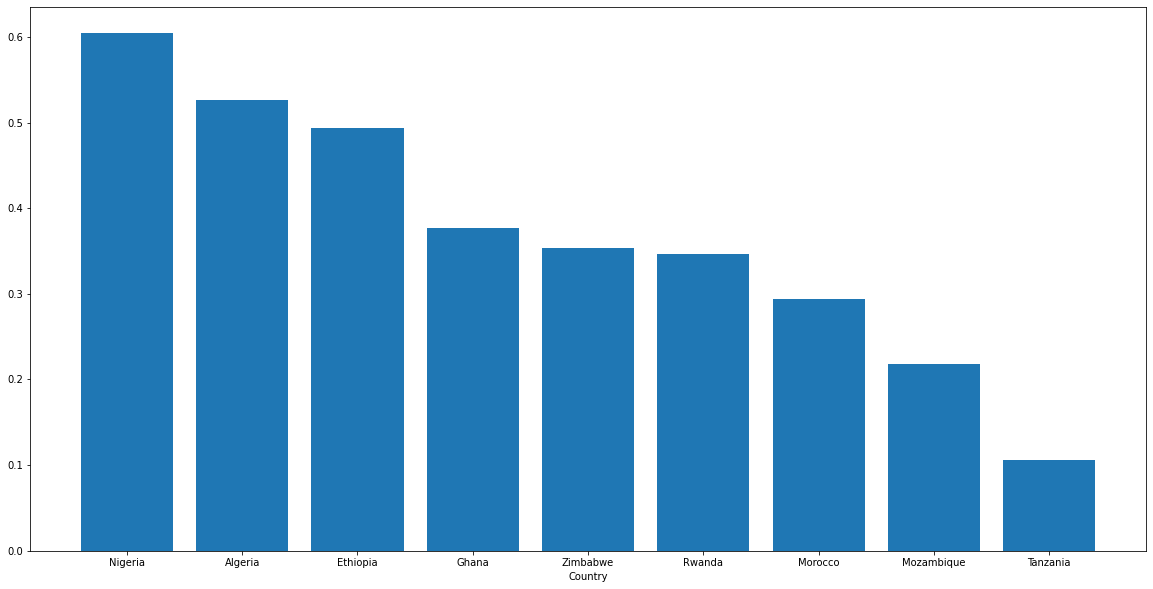

In [31]:
# for each language, calculate the percentage of positive tweets

positivity={}
for key in languages:
    positivity[key] = languages[key][1] / (languages[key][0] + languages[key][1] + languages[key][2])

# sort the languages by positivity
positivitys = sorted(positivity.items(), key=lambda x: x[1], reverse=True)

# convert language to country

country = {}
for i in range(len(countries)):
    country[countries[i][0]] = countries[i][1]

# add country to positivitys
for i in range(len(positivitys)):
    positivitys[i] = [country[positivitys[i][0]], positivitys[i][1]]

# sort country based on positivity

positivitys = sorted(positivitys, key=lambda x: x[1], reverse=True)

print(positivitys)

# plot the data

plt.figure(figsize=(20, 10))
plt.bar([x[0] for x in positivitys], [x[1] for x in positivitys])
# make the x-axis labels readable
# plt.xticks(rotation=90)
plt.xlabel('Country')
plt.show()